In [1]:
!wget -q https://raw.githubusercontent.com/ttran293/cmsc-636/refs/heads/main/top-500-profit-movies.csv

In [37]:
import pandas as pd
df = pd.read_csv("top-500-profit-movies.csv",  delimiter=",")
df = df[['title ','worldwide gross (m)', 'year', 'decade']]
df = df.sort_values(by="worldwide gross (m)", ascending=False).head(500)

print(df.columns)
print(df.head())
print(df.tail())


Index(['title ', 'worldwide gross (m)', 'year', 'decade'], dtype='object')
                     title   worldwide gross (m)  year  decade
33                   Avatar               2923.0  2009  2000's
36        Avengers: Endgame               2798.0  2019  2010's
509                 Titanic               2202.0  1997  1990's
430       The Force Awakens               2070.0  2015  2010's
37   Avengers: Infinity War               2048.0  2018  2010's
                    title   worldwide gross (m)  year  decade
448     The Imitation Game                220.0  2014  2010's
534                     Us                216.6  2019  2010's
254          Me Before You                208.0  2016  2010's
302  Paranormal Activity 3                207.0  2011  2010's
300   Paranormal Activity                 194.0  2009  2000's


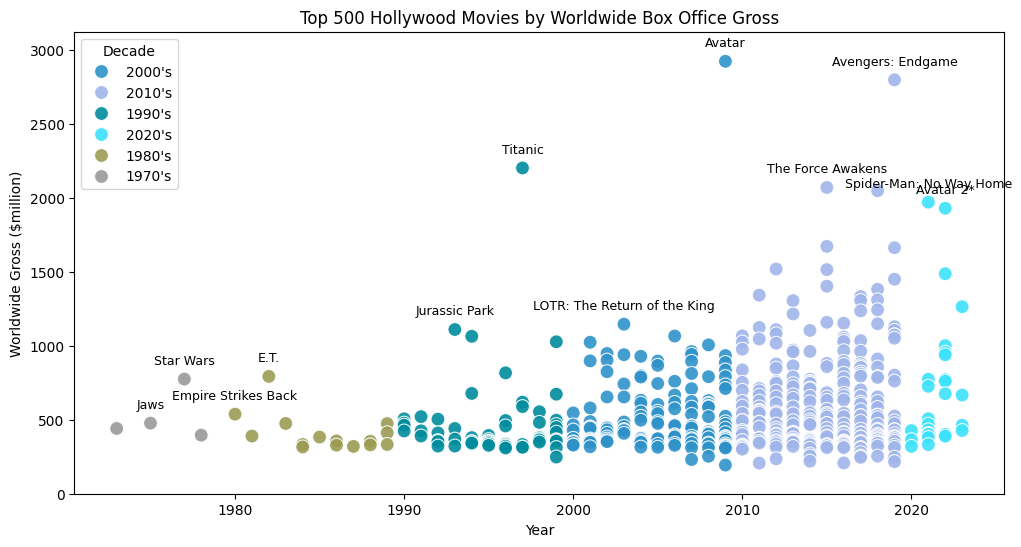

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['worldwide gross (m)'] = pd.to_numeric(df['worldwide gross (m)'], errors='coerce')

plt.figure(figsize=(12, 6))

palette = {
    "1970's": "#999999",
    "1980's": "#9B9B54",
    "1990's": "#008C9D",
    "2000's": "#2E92C9",
    "2010's": "#A0B5E9",
    "2020's": "#3CE2FB"
}

sns.scatterplot(
    data=df,
    x="year",
    y="worldwide gross (m)",
    hue="decade",
    palette=palette,
    alpha=0.9,
    s=100
)

plt.ylim(0, max(df["worldwide gross (m)"]) + 200)

offset = 100

top_movies_per_decade = df.sort_values(by=['decade', 'worldwide gross (m)'], ascending=[True, False]) \
                          .groupby('decade').head(2)
for _, row in top_movies_per_decade.iterrows():
    plt.text(row["year"], row["worldwide gross (m)"] + offset, row["title "], fontsize=9, ha='center', color='black')



plt.xlabel("Year")
plt.ylabel("Worldwide Gross ($million)")
plt.title("Top 500 Hollywood Movies by Worldwide Box Office Gross")
plt.legend(title="Decade", loc="upper left")
plt.show()
